<a href="https://colab.research.google.com/github/noelmt7/Lab-8/blob/main/2348538_Noel_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv('/content/spam.csv')

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
# Replace "ham" with "not spam" in the "category" column
data['Category'] = data['Category'].replace('ham', 'not spam')

In [6]:
data.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


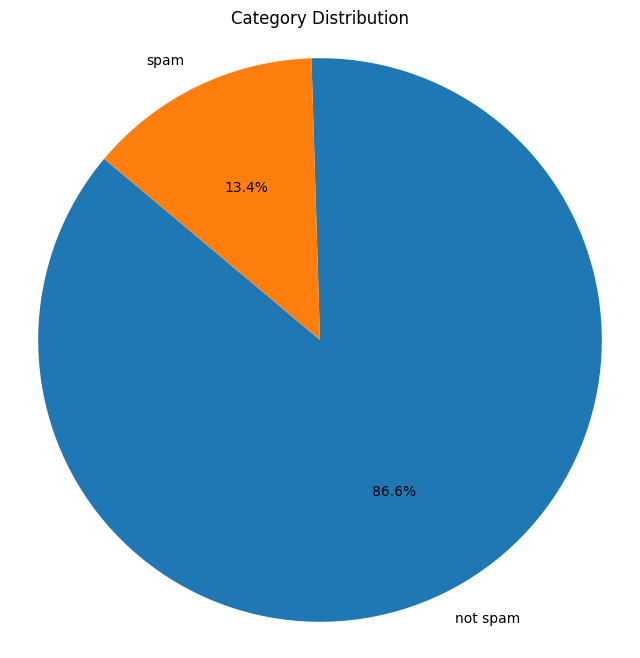

In [7]:
category_counts = data['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = data['Message']
y = data['Category'].apply(lambda x: 1 if x == 'spam' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
alpha = 1.0  # Laplace smoothing parameter
model = MultinomialNB(alpha=alpha)
model.fit(X_train_transformed, y_train)


MultinomialNB()

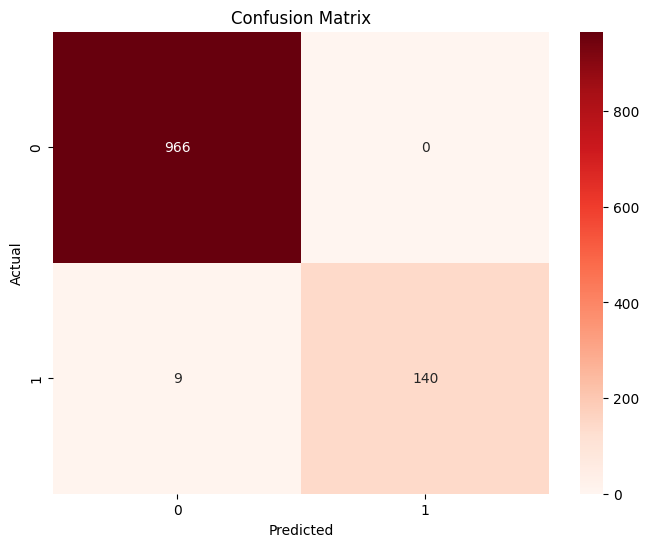

In [10]:

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, f1_score

y_pred = model.predict(X_test_transformed)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

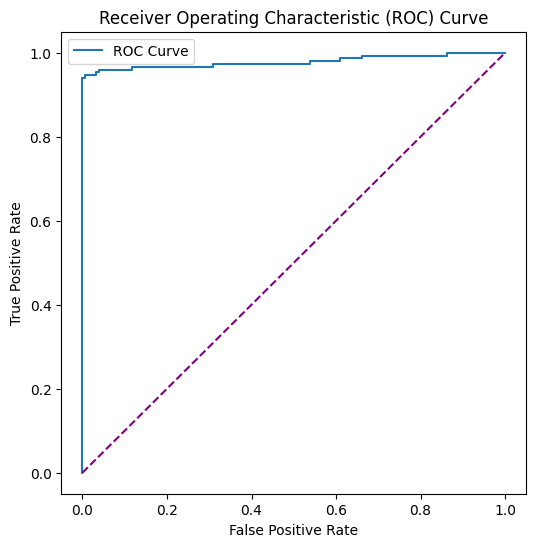

In [11]:

y_prob = model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='purple')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


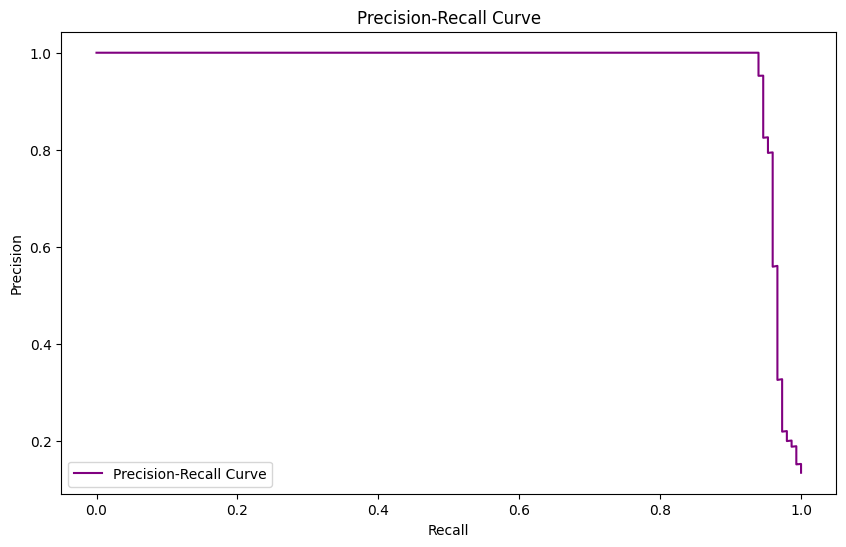

In [12]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve',color='Purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

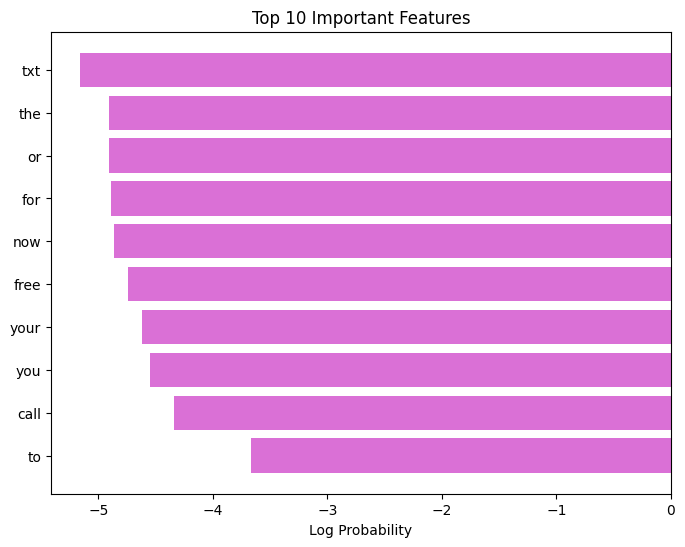

In [24]:
feature_names = vectorizer.get_feature_names_out()
feature_probabilities = model.feature_log_prob_[1]  # Considering spam class


sorted_indices = feature_probabilities.argsort()[::-1]
top_n = 10  # Displaying top N important features
top_features = [feature_names[i] for i in sorted_indices[:top_n]]
top_probabilities = [feature_probabilities[i] for i in sorted_indices[:top_n]]

plt.figure(figsize=(8, 6))
plt.barh(top_features, top_probabilities, color='orchid')
plt.xlabel('Log Probability')
plt.title('Top 10 Important Features')
plt.show()

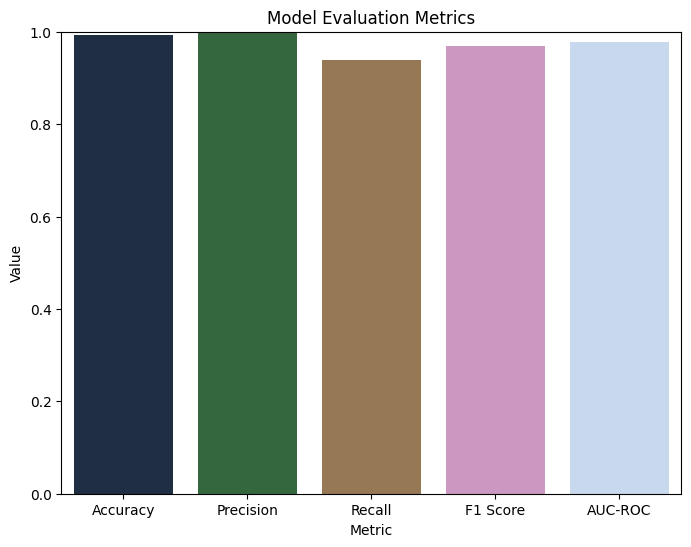

In [23]:

# Calculate evaluation metrics (accuracy, precision, recall, F1 Score, AUC-ROC)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

# Create a DataFrame to hold the metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Value': [accuracy, precision, recall, f1, auc_roc]
})

# Set a custom color palette using Seaborn
custom_palette = sns.color_palette("cubehelix", len(metrics))

# Create the bar plot with the custom color palette
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=metrics, palette=custom_palette)
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()